In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
data.shape

(11162, 17)

In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

<AxesSubplot:>

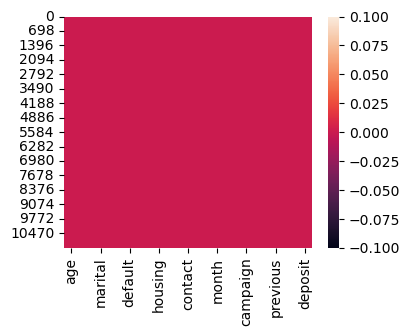

In [7]:
plt.figure(figsize=(4,3))
sns.heatmap(data.isnull())

In [8]:
data.duplicated().sum()

0

In [9]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

### Target variable

In [10]:
data['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

Text(0.5, 1.0, 'Deposit Distribution')

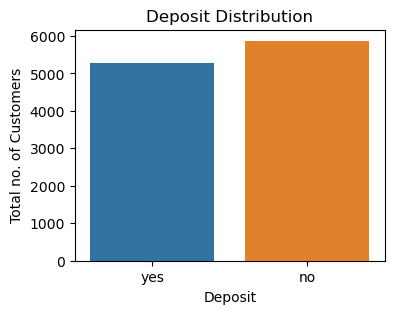

In [11]:
plt.figure(figsize=(4,3))
sns.countplot(x="deposit",data=data)
plt.xlabel("Deposit")
plt.ylabel("Total no. of Customers")
plt.title("Deposit Distribution")

#### here we can see our dataset is balanced

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.deposit = le.fit_transform(data['deposit'])

<AxesSubplot:>

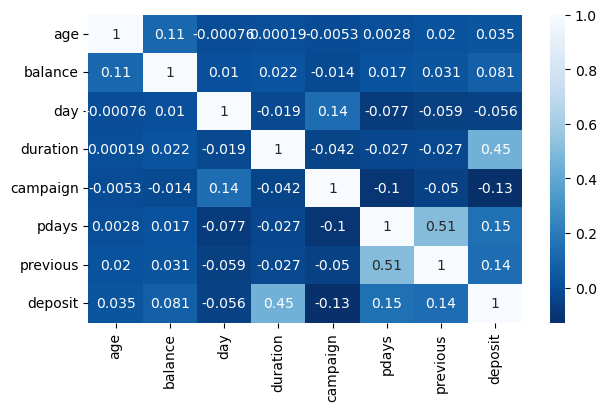

In [13]:
plt.figure(figsize=(7,4))
sns.heatmap(data.corr(),annot=True,cmap="Blues_r")

#### we can drop days and campaign columns as they have negative correlation with target variable thus it does not much affect the output

In [14]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous,deposit
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169,0.034901
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805,0.081129
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.056326
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.451919
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699,-0.128081
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272,0.151593
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.139867
deposit,0.034901,0.081129,-0.056326,0.451919,-0.128081,0.151593,0.139867,1.000000


##  continues columns of data

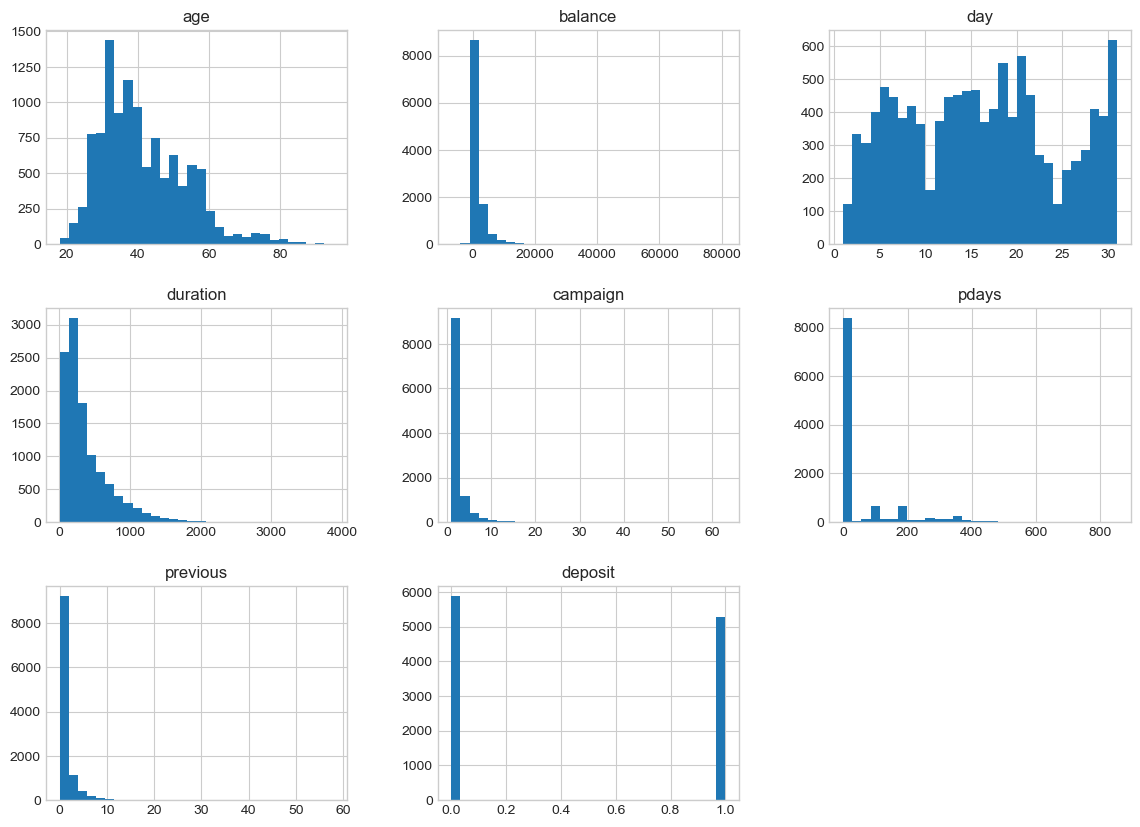

In [15]:
plt.style.use('seaborn-whitegrid')
data.hist(bins=30, figsize=(14,10), grid=True)
plt.show()

<AxesSubplot:>

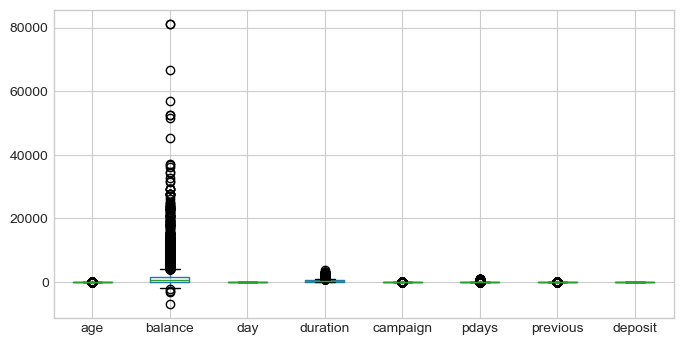

In [16]:
plt.style.use('seaborn-whitegrid')
data.boxplot(figsize=(8,4))

## Catagorical data columns

In [17]:
cols = ['job', 'marital', 'education', 'default', 
       'housing', 'loan','contact', 'month', 'poutcome']
dataN = data.copy()
dataN[cols] = dataN[cols].apply(LabelEncoder().fit_transform)
dataN.tail(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0
11161,34,9,1,1,0,0,0,0,0,9,5,628,1,-1,0,3,0


<AxesSubplot:>

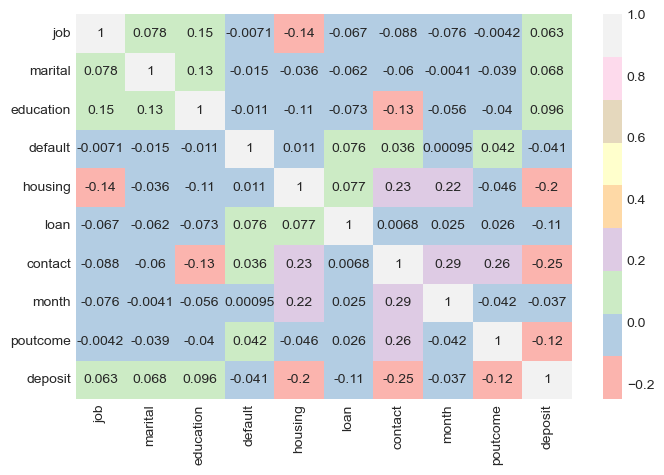

In [18]:
colmn = ['job', 'marital', 'education', 'default', 
       'housing', 'loan','contact', 'month', 'poutcome','deposit']
plt.figure(figsize=(8,5))
sns.heatmap(dataN[colmn].corr(),annot=True,cmap="Pastel1")

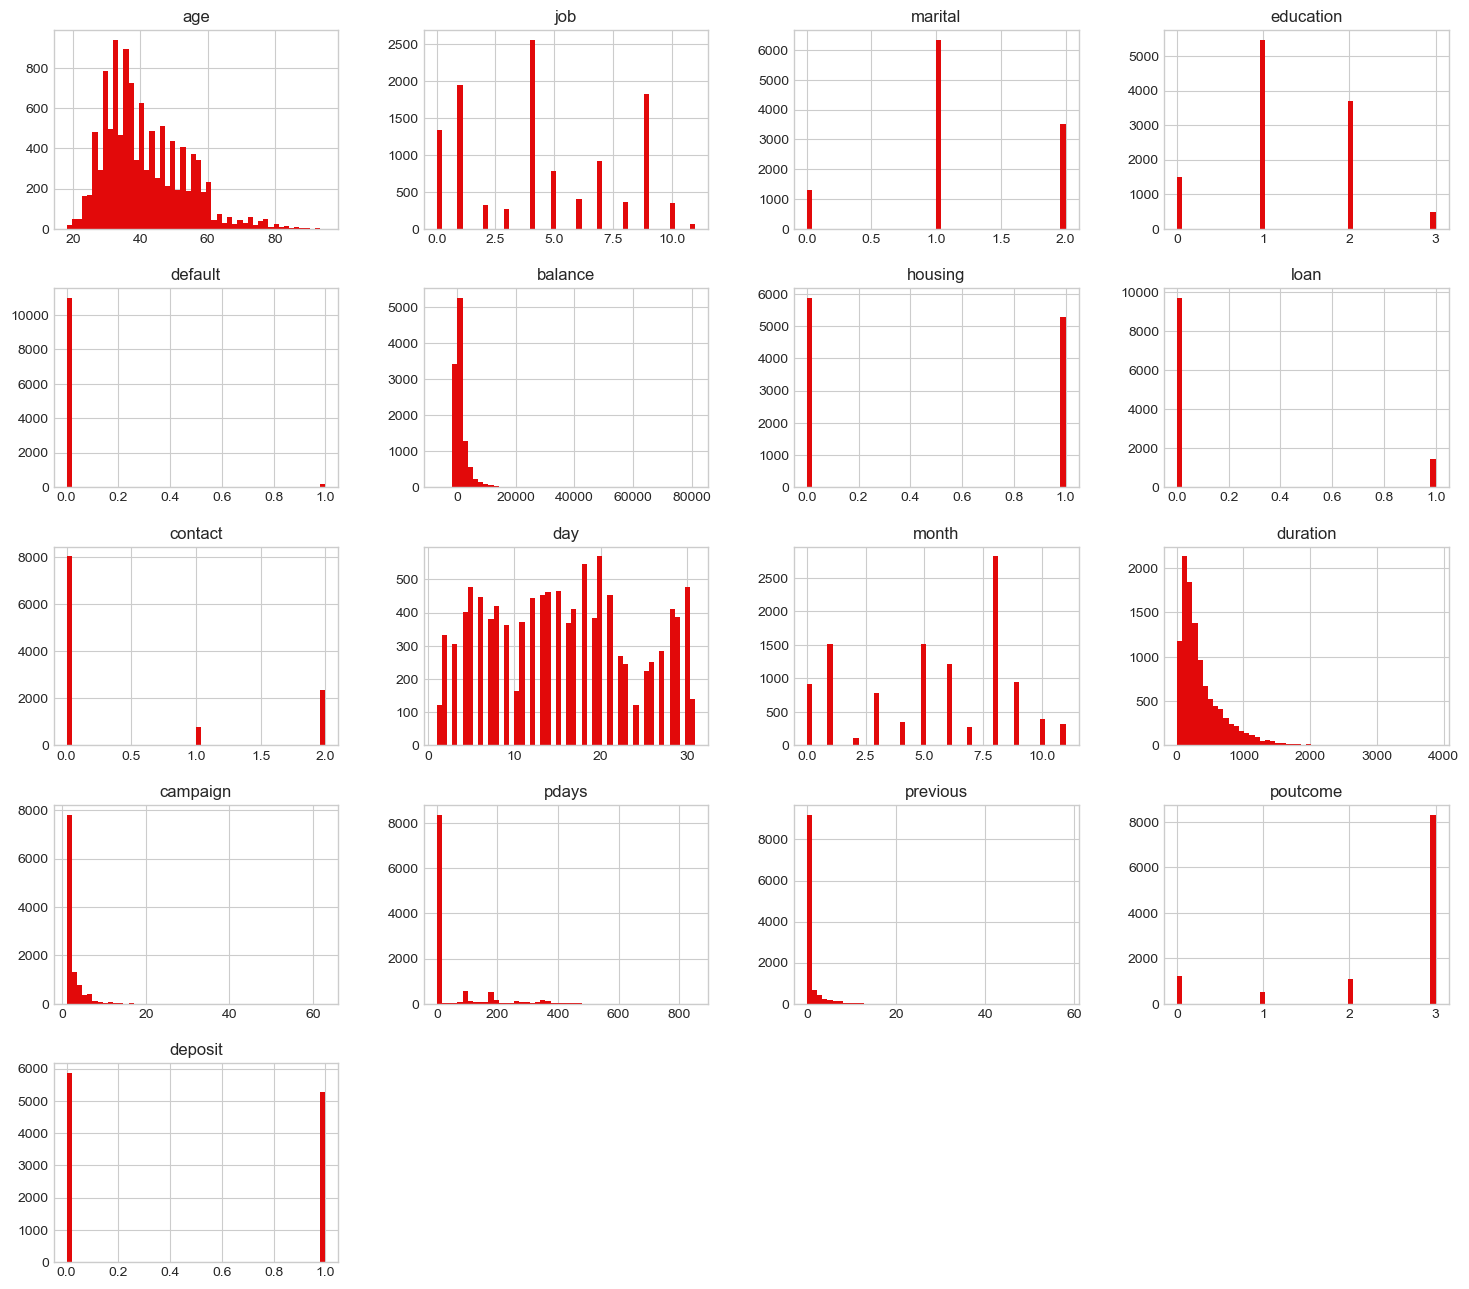

In [19]:
dataN.hist(bins = 50, figsize=(18,16), color ='#E2090A') 
plt.show()

### Drop extra columns from the data

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  int32 
dtypes: int32(1), int64(7), object(9)
memory usage: 1.4+ MB


In [21]:
data1=dataN.drop(['campaign','marital','day','job','default','loan'],
                 axis=1)

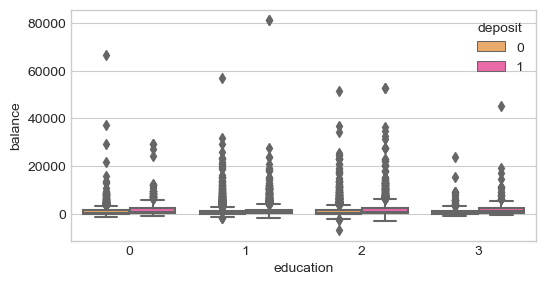

In [22]:
plt.figure(figsize=(6,3))
g = sns.boxplot(x="education",y="balance",hue="deposit",data=data1, palette="spring_r")

In [23]:
data1['education'].unique()

array([1, 2, 0, 3])

In [24]:
data1['education'].value_counts()

1    5476
2    3689
0    1500
3     497
Name: education, dtype: int64

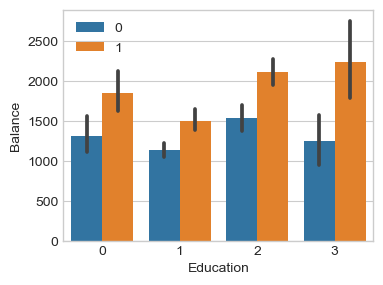

In [25]:
plt.figure(figsize=(4,3))
sns.barplot( x='education',y='balance',hue='deposit',data=data1)
plt.xlabel("Education")
plt.ylabel("Balance")
plt.legend()

<AxesSubplot:xlabel='deposit', ylabel='balance'>

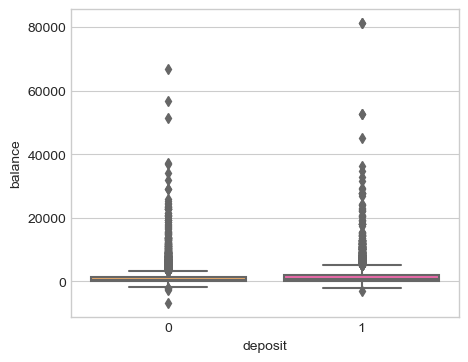

In [26]:
plt.figure(figsize=(5,4))
sns.boxplot(x="deposit",y='balance',data=data1, palette="spring_r")

In [27]:
data1['poutcome'].unique()

array([3, 1, 0, 2])

<AxesSubplot:ylabel='poutcome'>

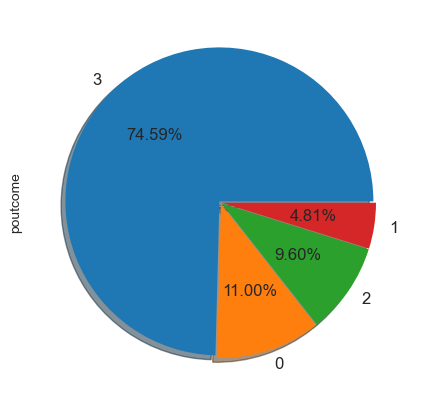

In [28]:
ax =plt.figure(figsize=(5,5))
data1["poutcome"].value_counts().plot.pie(explode=[0.01,0.01,0.01,0.01], autopct='%1.2f%%', shadow=True, fontsize=12)

In [29]:
data1['housing'].unique()

array([1, 0])

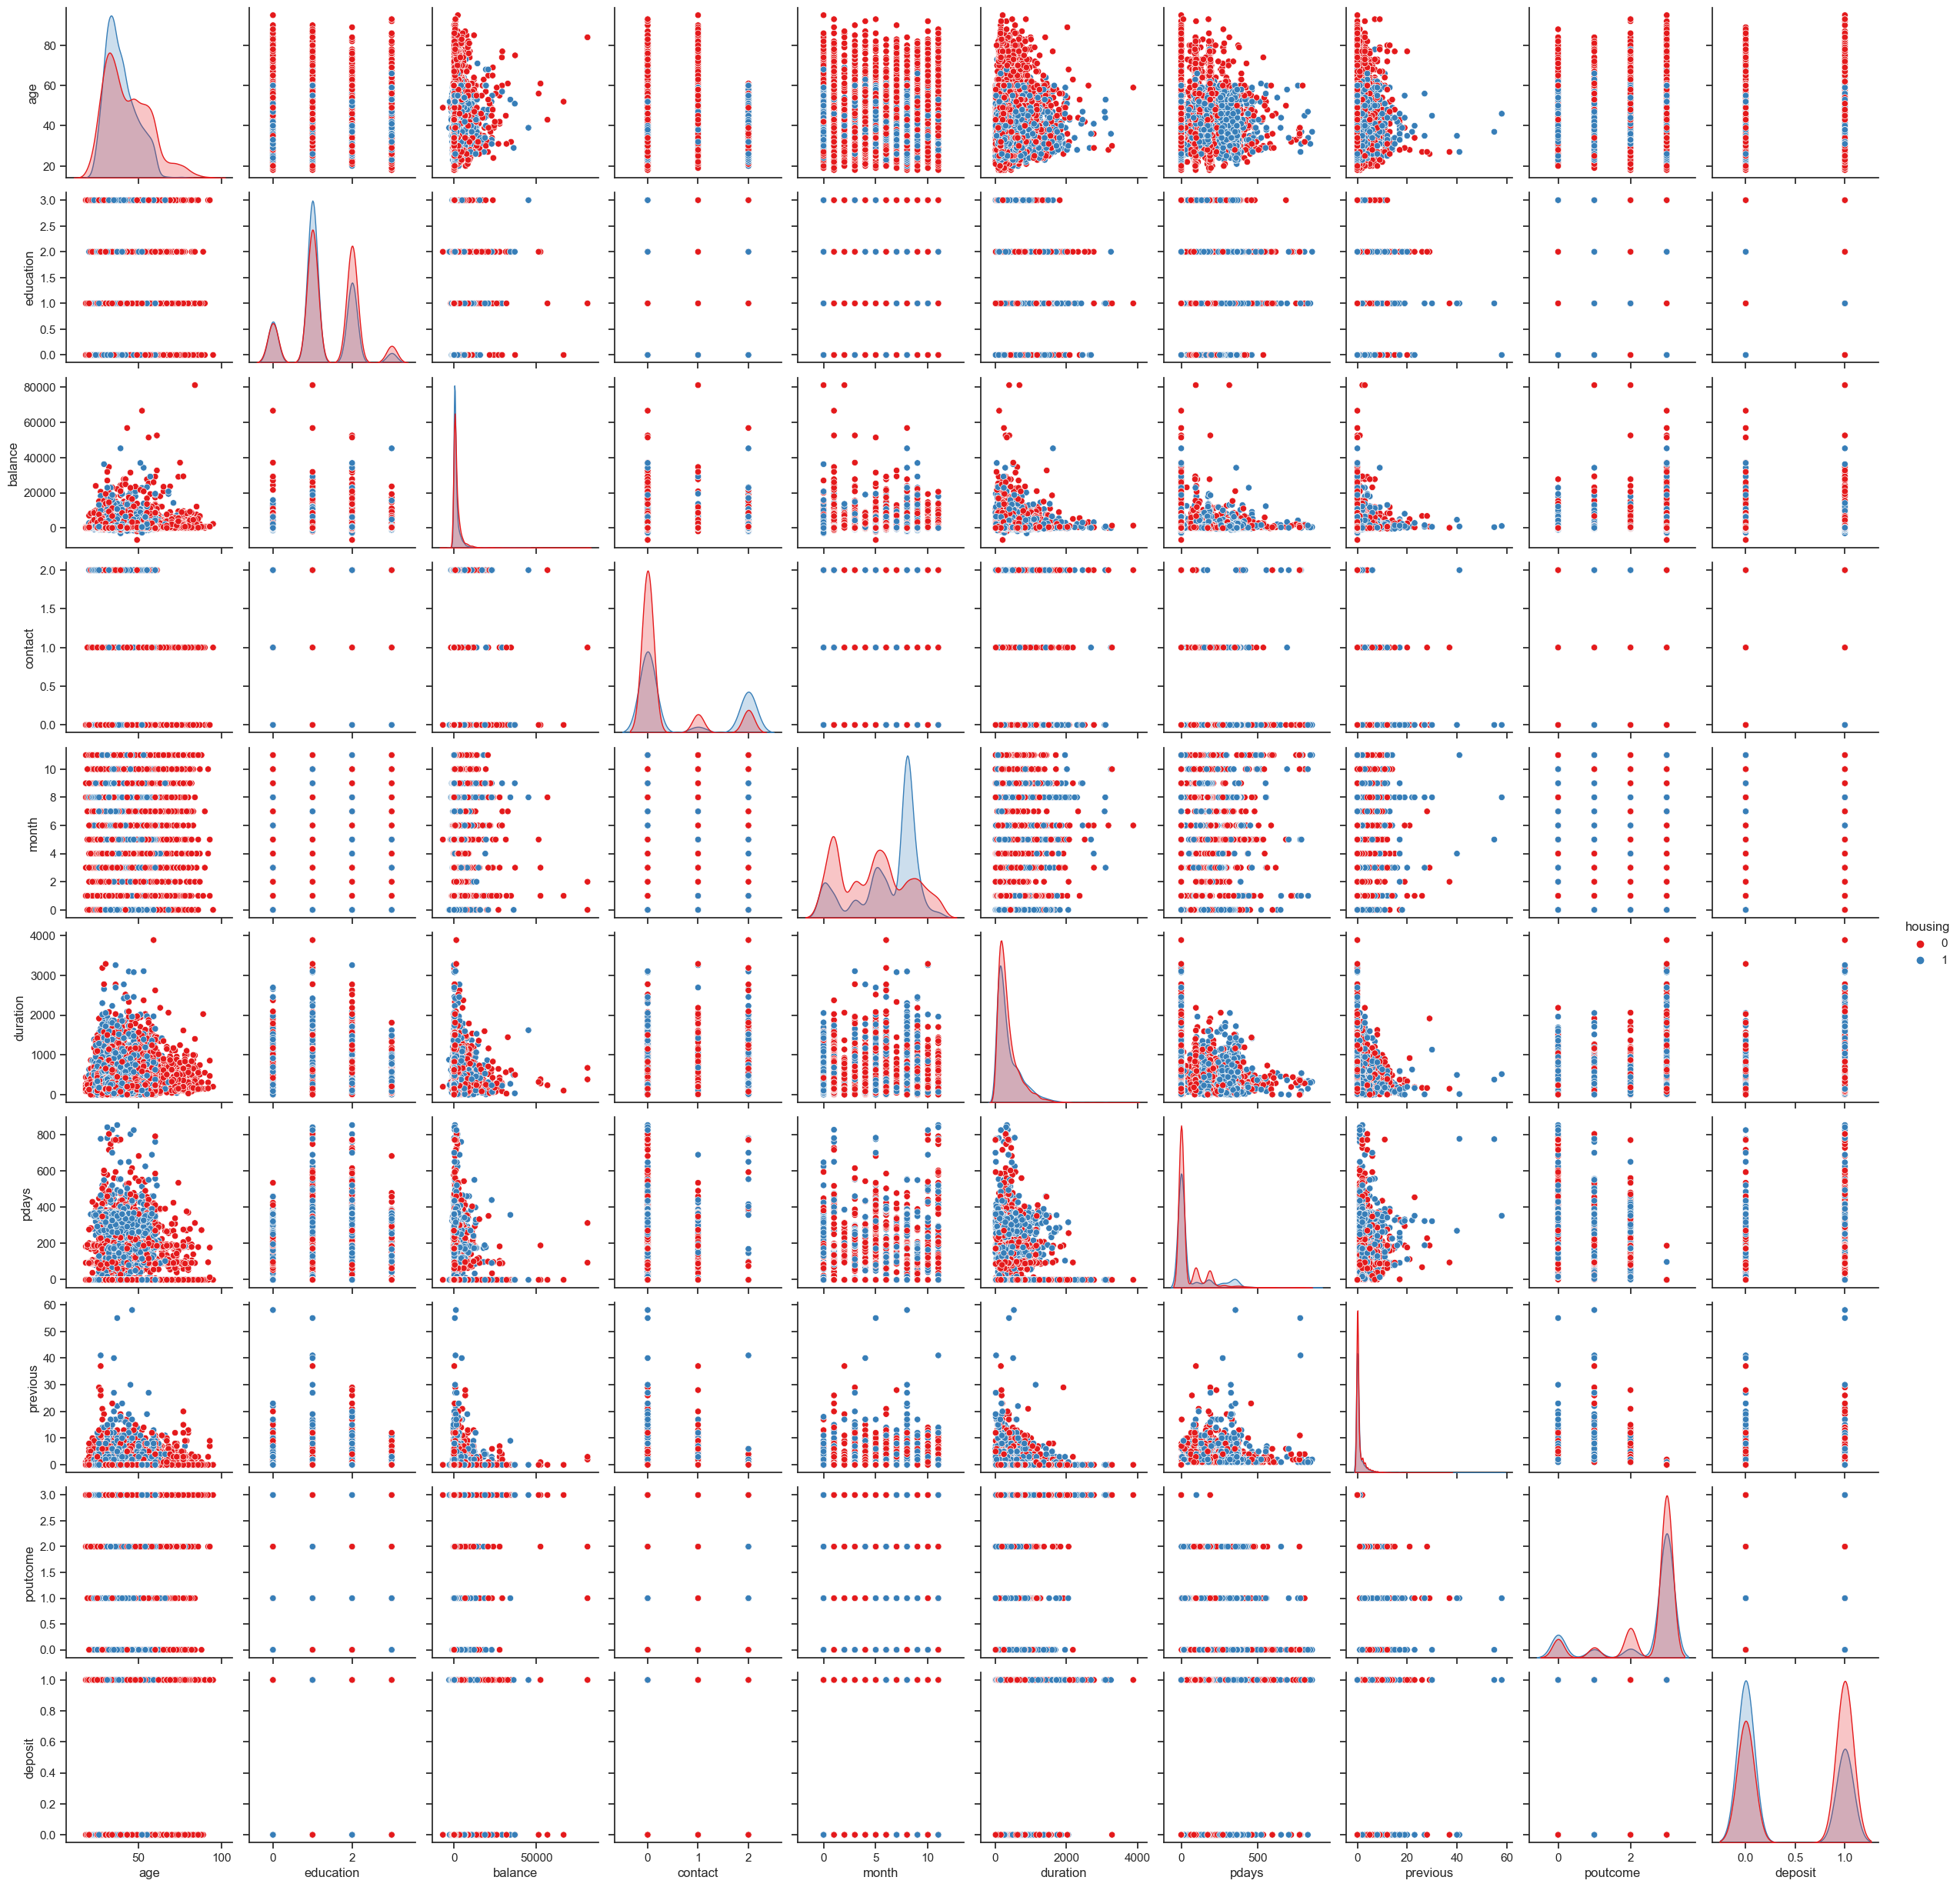

In [30]:
sns.set(style="ticks")
sns.pairplot(data1, hue="housing", palette="Set1")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
x = data1.drop('deposit', axis=1)
y = data1['deposit']

In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,stratify=y,random_state=42, shuffle=True)

### Gradient Boosting Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(n_estimators=90)
model= gbc.fit(xtrain,ytrain)

In [35]:
pred = gbc.predict(xtest)

In [36]:
acc = accuracy_score(ytest,pred)
cm = confusion_matrix(ytest,pred)
print(classification_report(ytest,pred))
print('Accuracy is: {}'.format(acc))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1469
           1       0.82      0.86      0.84      1322

    accuracy                           0.84      2791
   macro avg       0.84      0.84      0.84      2791
weighted avg       0.85      0.84      0.84      2791

Accuracy is: 0.8441418846291652


Text(0.5, 1.0, 'Gradient Boosting Classifier')

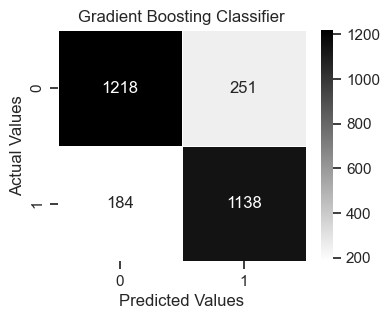

In [37]:
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5,cmap="gray_r")
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Gradient Boosting Classifier')

In [38]:
#Cross validate the model
score = cross_val_score(model, xtest, ytest, cv=3)
mean = score.mean()
print("The cross validation score is {} and the mean is {}".format(score,mean))

The cross validation score is [0.84425349 0.8172043  0.8311828 ] and the mean is 0.8308801958814086


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision Score: ', precision_score(ytest, pred))
print('Recall Score: ', recall_score(ytest, pred))
print('F1 Score: ', f1_score(ytest, pred))
print('Accuracy: ', acc)

Precision Score:  0.8192944564434845
Recall Score:  0.8608169440242057
F1 Score:  0.8395426042050904
Accuracy:  0.8441418846291652


In [40]:
from sklearn.metrics import roc_auc_score
rou = roc_auc_score(ytest, pred)
print("ROC-AUC Score: ",rou)

ROC-AUC Score:  0.8449762051639068
